# Introdução à Programação para Ciência de Dados

### Aula 18: Pandas II

**Professor:** Igor Malheiros

## Construindo tabela via .csv

A maneira mais comum para processar uma tabela no Pandas é tomando como entrada uma planilha. O Pandas oferece suporte para leitura direta de extensões como `.csv`, `.json`, `.html`. Durante esse curso, focaremos na leitura de planilhas com extensão `.csv`.

Os arquivos `.csv` (*comma-separated values*) são arquivos de textos cujas colunas são separadas por vírgulas e cada linha por uma quebra de linha. Quando abrimos um arquivo `.csv` por algum programa de edição de planilhas, o que o software faz é formatar o texto lido e apresentá-lo de forma mais simples para o usuário. O Pandas fornece uma função chamada `read_csv()` que tem o mesmo comportamento, ou seja, vai ler o arquivo de texto e formatá-lo para melhor apresentação e processamento. Essa função retorna uma estrutura de dados do tipo **DataFrame** com as informações do arquivo lido.

</br></br>

```
# Arquivo "auto.csv" cru

Focus,1198,11.90
F-150,2136,5.53
Fusion,1492,8.50
Taurus,1652,7.65
```
</br></br>

```Python
import pandas as pd

# Lendo arquivo "auto.csv"
df = pd.read_csv("auto.csv")
```

|     |     |       |
|:---:|:---:|:-----:|
Focus | 1198 | 11.90|
F-150 | 2136 | 5.53 |
Fusion| 1492 | 8.50 |
Taurus| 1652 |7.65  |

</br></br>

É importante destacar que se o arquivo não estiver no mesmo diretório em que o seu arquivo Python `.py` ou seu notebook `ipynb`, devemos passar seu caminho relativo arquivo `.csv`. Por exemplo, se o arquivo `"auto.csv"` estiver dentro de um outro diretório chamado `"data"`, teríamos que utilizar `"data/auto.csv"`.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Lendo arquivo csv
df = pd.read_csv("data/auto.csv")
df

,modelo,massa (kg),C (km/litro)
0,Focus,1198,11.90
1,Crown Victoria,1715,6.80
2,Expedition,2530,5.53
3,Explorer,2014,6.38
4,F-150,2136,5.53
5,Fusion,1492,8.50
6,Taurus,1652,7.65
7,Fit,1168,13.60
8,Accord,1492,9.78
9,CR-V,1602,8.93


In [5]:
# Para utilizar alguma das colunas como índice,
# precisamos utilizar o parametro `index_col=[n]`
# Em que `n` é a posição da coluna em que
# utilizaremos como nome da linha
df = pd.read_csv("data/auto.csv", index_col=[0])
df

,massa (kg),C (km/litro)
modelo,,
Focus,1198,11.90
Crown Victoria,1715,6.80
Expedition,2530,5.53
Explorer,2014,6.38
F-150,2136,5.53
Fusion,1492,8.50
Taurus,1652,7.65
Fit,1168,13.60
Accord,1492,9.78


## Removendo dados do DataFrame

Um importante processamento que podemos utilizar nas tabelas é remover informações, sejam elas linhas ou colunas.

### Removendo colunas

Para remover as colunas de um DataFrame, basta utilizarmos a função `drop()`. Essa função recebe como parâmetro uma lista com os nomes das colunas que desejamos remover e utilizaremos o parâmetro `axis='columns'` para determinar que estamos removendo colunas.

### Removendo linhas

Para remover as linhas de um DataFrame, também utilizamos a função `drop()`. Passaremos também uma lista com os nomes das linhas que desejamos remover, entretanto, utilizaremos o parâmetro `axis='rows'` para determinar que estamos removendo linhas do DataFrame.

É importante destacar que por padrão o `drop()` vai retornar uma nova tabela, deixando a tabela original intacta. Se quisermos realmente modificar a tabela que estamos manipulando, precisamos utilizar o parâmetro `inplace=True`.

In [9]:
# Removendo coluna
dff = df.drop(['massa (kg)'], axis='columns')
dff

,C (km/litro)
modelo,
Focus,11.90
Crown Victoria,6.80
Expedition,5.53
Explorer,6.38
F-150,5.53
Fusion,8.50
Taurus,7.65
Fit,13.60
Accord,9.78


In [10]:
# Removendo coluna in place
df.drop(["massa (kg)"], axis='columns', inplace=True)
df

,C (km/litro)
modelo,
Focus,11.90
Crown Victoria,6.80
Expedition,5.53
Explorer,6.38
F-150,5.53
Fusion,8.50
Taurus,7.65
Fit,13.60
Accord,9.78


In [13]:
# Removendo linha
dff = df.drop(['Fit', 'Focus'], axis='rows')
dff

,C (km/litro)
modelo,
Crown Victoria,6.80
Expedition,5.53
Explorer,6.38
F-150,5.53
Fusion,8.50
Taurus,7.65
Accord,9.78
CR-V,8.93
Civic,11.90


In [14]:
# Removendo linhas inplace
df.drop(['Fit', 'Focus'], axis='rows', inplace=True)
df

,C (km/litro)
modelo,
Crown Victoria,6.80
Expedition,5.53
Explorer,6.38
F-150,5.53
Fusion,8.50
Taurus,7.65
Accord,9.78
CR-V,8.93
Civic,11.90


In [15]:
# Carregando o DataFrame mais uma vez
df = pd.read_csv("data/auto.csv", index_col=[0])
df

,massa (kg),C (km/litro)
modelo,,
Focus,1198,11.90
Crown Victoria,1715,6.80
Expedition,2530,5.53
Explorer,2014,6.38
F-150,2136,5.53
Fusion,1492,8.50
Taurus,1652,7.65
Fit,1168,13.60
Accord,1492,9.78


## Adicionando dados ao DataFrame

O Pandas também fornece funções para adicionarmos linhas e colunas ao nosso DataFrame.

### Adicionando colunas

Para adicionarmos uma nova coluna ao DataFrame, basta criamos uma nova Serie, pois cada coluna em um DataFrame é uma Serie. Em seguida, precisamos acessar uma nova coluna que estamos criando no DataFrame e atribuir o valor da Serie criada, similar ao que acontece com os dicionários em Python.

</br></br>

```Python
serie_marca = pd.Series(
    ['Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Honda', 'Honda', 'Honda', 'Honda', 'Honda'],
    index=['Focus', 'Crown Victoria', 'Expedition', 'Explorer', 'F-150', 'Fusion', 'Taurus', 'Fit', 'Accord', 'CR-V', 'Civic', 'Ridgeline'],
    name='marcas'
)
df['marca'] = serie_marca
```

</br></br>

Poderíamos utilizar o operador de broadcast para fazer uma atribuição de mesmo valor em uma nova coluna criada.

</br></br>

```Python
df['numero de rodas'] = 4
```

</br></br>

### Adicionando linhas

Para criarmos uma nova linha no DataFrame, nós também vamos criar primeiro uma Serie. Porém, essa Serie será criada como um dicionário, onde cada chave é o nome de uma das colunas e o valor é o dado inserido naquela coluna. Em seguida, atribuímos via `loc[]` a nova Serie que criamos.

</br></br>

```Python
serie_fox = pd.Series({
    'massa (kg)': 1.009,
    'C (km/litro)': 7.8,
    'marca': 'volkswagen',
    'numero de rodas': 4
}, name='Fox')

df.loc['Fox'] = serie_fox
```

</br></br>

## Modificações

### Modificando colunas/linhas

Podemos utilizar a mesma sintaxe de adicionar uma coluna/linha para modificar uma coluna/linha já existente. Isso significa que para modificar uma coluna/linha devemos criar uma nova Serie e atribuí-la à coluna/linha já existente, similar aos dicionários de Python.

</br></br>

```Python
serie_fox = pd.Series({
    'massa (kg)': 1.100,
    'C (km/litro)': 8.5,
    'marca': 'volkswagen',
    'numero de rodas': 4
}, name='Fox')

df.loc['Fox'] = serie_fox
```

</br></br>


### Modificando Nomes das Colunas/Linhas

É possível renomear os nomes das colunas e das linhas com a função `rename()`. Essa função recebe como parâmetro `columns=dic_c`, onde `dic_c` é um dicionário em que as chaves são os nomes antigos das colunas e os valores associados são os novos nomes das colunas, e `index={dic_i}`, onde `dic_i` é um dicionário em que as chaves são os nomes antigos das linhas e os valores associados são os novos nomes das linhas.

A função `rename()` não modifica o DataFrame por padrão. Se quisermos modificá-lo, precisamos utilizar o parâmetro `inplace=True`.

</br></br>

```Python
df.rename(
    columns={
        'massa (kg)': 'Massa',
        'C (km/litro)': 'Km/L'
    },
    index={
        'Fox': 'FOX'
    }
)
```

In [18]:
# Adicionando uma nova coluna por uma Serie
serie_marca = pd.Series(
    ['Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Honda', 'Honda', 'Honda', 'Honda', 'Honda'],
    index=['Focus', 'Crown Victoria', 'Expedition', 'Explorer', 'F-150', 'Fusion', 'Taurus', 'Fit', 'Accord', 'CR-V', 'Civic', 'Ridgeline'],
    name='marcas'
)
df['marcas'] = serie_marca
df

,massa (kg),C (km/litro),marcas
modelo,,,
Focus,1198,11.90,Ford
Crown Victoria,1715,6.80,Ford
Expedition,2530,5.53,Ford
Explorer,2014,6.38,Ford
F-150,2136,5.53,Ford
Fusion,1492,8.50,Ford
Taurus,1652,7.65,Ford
Fit,1168,13.60,Honda
Accord,1492,9.78,Honda


In [19]:
# Adicionando uma nova coluna com um valor padrão
df['Número de rodas'] = 4
df

,massa (kg),C (km/litro),marcas,Número de rodas
modelo,,,,
Focus,1198,11.90,Ford,4
Crown Victoria,1715,6.80,Ford,4
Expedition,2530,5.53,Ford,4
Explorer,2014,6.38,Ford,4
F-150,2136,5.53,Ford,4
Fusion,1492,8.50,Ford,4
Taurus,1652,7.65,Ford,4
Fit,1168,13.60,Honda,4
Accord,1492,9.78,Honda,4


In [23]:
# Adicionando uma nova linha
serie_fox = pd.Series({
    'massa (kg)': 1.009,
    'C (km/litro)': 7.8,
    'marcas': 'volkswagen',
    'Número de rodas': 4
}, name='Fox')

df.loc['Fox'] = serie_fox
df

,massa (kg),C (km/litro),marcas,Número de rodas
modelo,,,,
Focus,1198.000,11.90,Ford,4.0
Crown Victoria,1715.000,6.80,Ford,4.0
Expedition,2530.000,5.53,Ford,4.0
Explorer,2014.000,6.38,Ford,4.0
F-150,2136.000,5.53,Ford,4.0
Fusion,1492.000,8.50,Ford,4.0
Taurus,1652.000,7.65,Ford,4.0
Fit,1168.000,13.60,Honda,4.0
Accord,1492.000,9.78,Honda,4.0


In [25]:
# Modificando uma linha existente
serie2_fox = pd.Series({
    'massa (kg)': 1100,
    'C (km/litro)': 8.5,
    'marcas': 'volkswagen',
    'Número de rodas': 4
}, name='Fox')

df.loc['Fox'] = serie2_fox
df

,massa (kg),C (km/litro),marcas,Número de rodas
modelo,,,,
Focus,1198.0,11.90,Ford,4.0
Crown Victoria,1715.0,6.80,Ford,4.0
Expedition,2530.0,5.53,Ford,4.0
Explorer,2014.0,6.38,Ford,4.0
F-150,2136.0,5.53,Ford,4.0
Fusion,1492.0,8.50,Ford,4.0
Taurus,1652.0,7.65,Ford,4.0
Fit,1168.0,13.60,Honda,4.0
Accord,1492.0,9.78,Honda,4.0


In [26]:
# Modificando os nomes das linhas e colunas
df.rename(
    columns={
        'massa (kg)': 'Massa',
        'C (km/litro)': 'Consumo',
        'marcas': 'Marcas'
    },index={
        'Fox':'FOX'
    }, inplace=True)
df

,Massa,Consumo,Marcas,Número de rodas
modelo,,,,
Focus,1198.0,11.90,Ford,4.0
Crown Victoria,1715.0,6.80,Ford,4.0
Expedition,2530.0,5.53,Ford,4.0
Explorer,2014.0,6.38,Ford,4.0
F-150,2136.0,5.53,Ford,4.0
Fusion,1492.0,8.50,Ford,4.0
Taurus,1652.0,7.65,Ford,4.0
Fit,1168.0,13.60,Honda,4.0
Accord,1492.0,9.78,Honda,4.0


## Estatísticas

Dado uma Serie, é possível extrair algumas informações estatísticas com funções disponibilizadas pelo Pandas. Isso pode ser muito útil para analisarmos os dados de uma coluna inteira.

- `df['c'].min()` - Retorna o valor mínimo para coluna `c`

- `df['c'].argmin()` - Retorna a posição da linha com valor mínimo para coluna `c`

- `df['c'].max()` - Retorna o valor máximo para coluna `c`

- `df['c'].argmax()` - Retorna a posição da linha com valor máximo para coluna `c`

- `df['c'].sum()` - Retorna a soma dos valores para coluna `c`

- `df['c'].mean()` - Retorna a média dos valores para coluna `c`

- `df['c'].std()` - Retorna o desvio padrão dos valores para coluna `c`

- `df['c'].median()` - Retorna a mediana dos valores para coluna `c`

In [27]:
# Valor mínimo
df['Massa'].min()

1100.0

In [28]:
# Posição da linha de valor mínimo
df['Massa'].argmin()

12

In [29]:
# Valor máximo
df['Massa'].max()

2530.0

In [31]:
# Posição da linha de valor máximo
df['Massa'].argmax()

2

In [32]:
# Soma dos valores
df['Massa'].sum()

21336.0

In [33]:
# Média dos valores
df['Massa'].mean()

1641.2307692307693

In [34]:
# Desvio padrão
df['Massa'].std()

438.1276742849725

In [35]:
# Mediana
df['Massa'].median()

1602.0

## Matplotlib

O Matplotlib é mais uma biblioteca de Python muito utilizada pelos cientistas de dados. Essa biblioteca fornece ferramentas voltadas para **visualização de dados**.

### Plot

O gráfico mais simples da Matplotlib são os gráficos Plot que vão traçar em um plano cartesiano associações entre duas listas (ou arrays Numpy, ou valores numéricos das Series), onde a primeira lista será o eixo $x$ e a segundo o eixo $y$.

A função que utilizaremos é a `plt.plot()`, deveremos passar duas listas(arrays Numpy, ou Series) de mesmo tamanho. Além disso, podemos modificar a cor da linha traçada, seu desenho, adicionar títulos e legendas.

Por último, podemos traçar mais de uma linha por gráfico.

In [36]:
import matplotlib.pyplot as plt

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


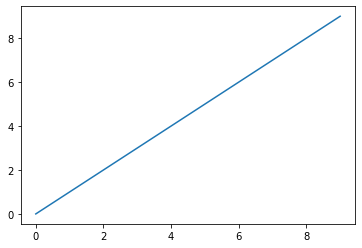

In [37]:
# Traçando uma reta (y = x)
x = [i for i in range(10)]
print(x)
y = x
print(y)
plt.plot(x, y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


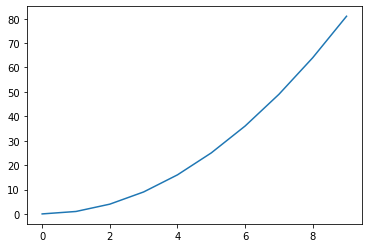

In [38]:
# Traçando uma curva (y = x^2)
# plt.plot(x, y)
x2 = [i for i in range(10)]
print(x2)
y2 = [i**2 for i in x2]
print(y2)
plt.plot(x2, y2)

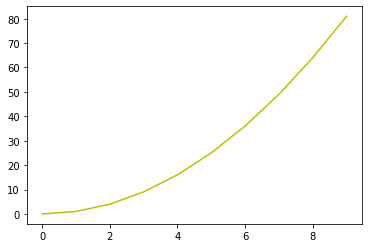

In [39]:
# Alterando a cor
# r -> red
# b -> blue
# g -> green
# y -> yellow
plt.plot(x2, y2, 'y')

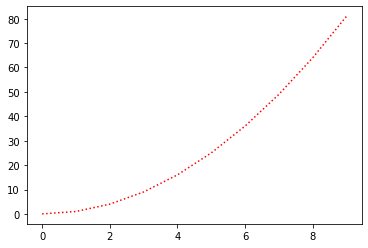

In [40]:
# Alterando o estilo da linha - -. :
plt.plot(x2, y2, 'r:')

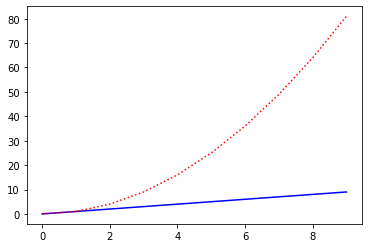

In [41]:
# Múltiplos gráficos
plt.plot(x, y, 'b')
plt.plot(x2, y2, 'r:')

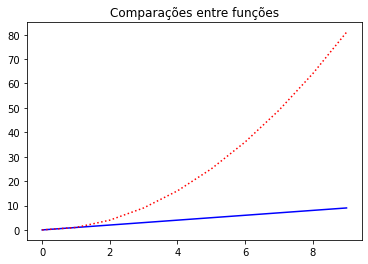

In [42]:
# Título plt.title()
plt.title("Comparações entre funções")
plt.plot(x, y, 'b')
plt.plot(x2, y2, 'r:')

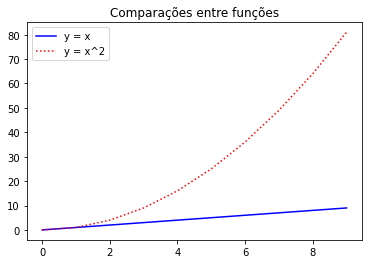

In [43]:
# Legenda interna - label = '', plt.legend()
plt.title("Comparações entre funções")
plt.plot(x, y, 'b', label='y = x')
plt.plot(x2, y2, 'r:', label='y = x^2')
plt.legend()

### Histogramas

Outro tipo de gráfico muito importante são os histogramas. Esses gráficos expressam a frequência em que determinado valor aconteceu em uma lista. Para criarmos esse tipo de gráfico, utilizaremos a função `plt.hist()` que vai receber apenas uma lista (ou array Numpy, ou Serie).

Podemos modificar sua cor e adicionar títulos.

Text(0.5, 1.0, 'Histograma')

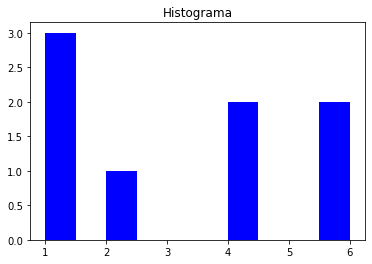

In [44]:
# Exemplo histograma
data = [1, 2, 1, 4, 6, 6, 4, 1]
plt.hist(data, color='b')
plt.title("Histograma")

## Exercício 1

- Qual modelo de carro com menor massa?
- Qual modelo de carro mais econômico?

In [53]:
linha_menor_massa = df['Massa'].argmin()
print(df.iloc[linha_menor_massa].name)

linha_maior_consumo = df['Consumo'].argmax()
print(df.iloc[linha_maior_consumo].name)

FOX
Fit


## Exercício 2

Construa uma subtabela apenas com veículos de massa menor do que `2000`. Qual a média de consumos desses veículos?

In [57]:
dff = df[df['Massa'] < 2000]
dff['Consumo'].mean()

9.72888888888889

## Exercício 3

Construa um histograma da marca dos veículos.

Text(0.5, 1.0, 'Histograma Marcas')

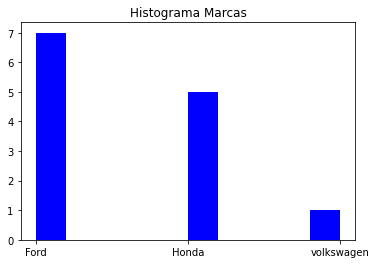

In [61]:
plt.hist(df['Marcas'], color='b')
plt.title("Histograma Marcas")